In [30]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 

import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer #importent
from sklearn import metrics

In [31]:
#load the data
df_news=datasets.fetch_20newsgroups()


In [32]:
#top view: information about the datasets
df_news.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [33]:
df_news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [35]:
#lets see all the label categories of the dataset-new group
df_news.target_names
print(df_news.data[1])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [39]:
#extract the variable from the datasets 
#TfidfVectorizer(overalll documnet weightage of all the word 
#and both are method for converting text data into vector are model and process only numerical data)
vectorizer=TfidfVectorizer()
#getr the data value in seperate variable 
x_train=vectorizer.fit_transform(df_news.data)
y_train=df_news.target

In [40]:
#getv the model to be raedy
model=MultinomialNB()

In [41]:
#train the using x_train,y_train values
model.fit(x_train,y_train)

MultinomialNB()

In [45]:
#test vthe model using unseen data 
#Load the test sample dataset
df_news_test=datasets.fetch_20newsgroups(subset="test")

#vectorize it
x_test=vectorizer.transform(df_news_test.data)

#split the traing set and test set
y_test=df_news_test.target

In [46]:
#get the testing data and predict it 
labels=model.predict(x_test)

In [49]:
#task : try to increse accurecy of the model
#test the model

cm=metrics.confusion_matrix(y_test,labels)
print("Accuracy: ",metrics.accuracy_score(y_test,labels))

Accuracy:  0.7738980350504514


Text(91.67999999999999, 0.5, 'predicted labels')

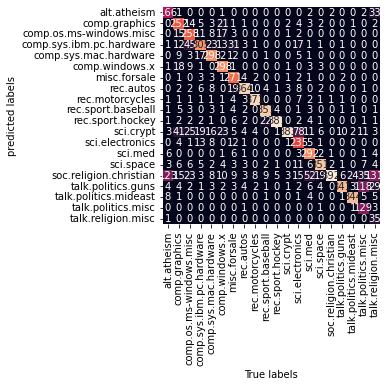

In [52]:
#visual the confusion matrics using heatmap graph
sns.heatmap(cm.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=df_news.target_names,yticklabels=df_news.target_names)
plt.xlabel("True labels")
plt.ylabel("predicted labels")

In [64]:
#magic method 
def predict_text(data):
    x_test=vectorizer.transform(data)
    pred=model.predict(x_test)
    return df_news.target_names[pred[0]]

In [67]:
predict_text(['jesus christ'])

'soc.religion.christian'